# PHYS465: Boosted Decision Trees

In python there are many libraries available for supervised learning. In particular we've forcused on `scikit-learn`. 

For consderation, another key library not touched during the course is `TensorFlow` which is developed by Google and has easy to use libraries for Random Forests and Neural Networks. This is definitely a good library to learn.

For today's exercise, we will focus on Decision Trees and Random Forests. This is implemented in `scikit-learn` through the module `RandomForestClassifier`, but here we will introduce the advanced concept : Gradient boosting. This is a state-of-the-art module, regularly used in Machine Learning Competitions

This is introduced using the library : `xgboost`

In [1]:
import xgboost as xgb # XGBoost stands for eXtreme Gradient Boosting

This algorithm goes by lots of different names such as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines.

Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. A popular example is the AdaBoost algorithm that weights data points that are hard to predict.

Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

This approach supports both regression and classification predictive modeling problems.

<img width=400 src="https://i.imgur.com/e7MIgXk.png" alt="xgb technique">

***

This method takes data in a wide variety of formats, including DataFrames

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/main/workshops/week15/datasets/houseprice_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### We can split the data into test/train easily using sci-kit learn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [4]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

### We can even fil in blank values

In [7]:
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

### To build a model is incredibly straight-forward

In [32]:
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

my_model = XGBRegressor(eval_metric='auc', objective='binary:hinge', max_depth=13, min_child_weight=7, seed=29)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='auc', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='binary:hinge', ...)

### To evaluate a model we use the predict function

In [33]:
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))


Mean Absolute Error : 174968.171875


## Tips:

_Model Tuning_:
XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed. The first parameters you should understand are:

 * n_estimators and early_stopping_rounds
 * n_estimators specifies how many times to go through the modeling cycle described above.
 * learning_rate : in general a small value will yield better results

In [35]:
my_model = XGBRegressor(n_estimators=1000, early_stopping_rounds=5, learning_rate=0.05)
my_model.fit(train_X, train_y,
             eval_set=[(test_X, test_y)], verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### We can also understand which features are important

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

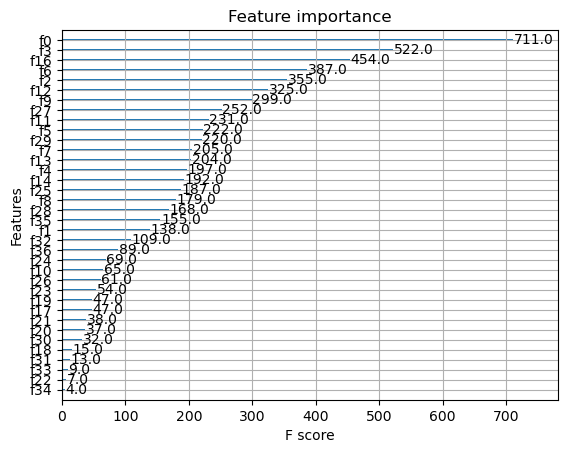

In [36]:
xgb.plot_importance(my_model)

In [72]:
train = pd.read_csv("https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/main/workshops/week15/datasets/tabular_train.csv")
test  = pd.read_csv("https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/main/workshops/week15/datasets/tabular_test.csv")

train.head()


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


<Axes: xlabel='target'>

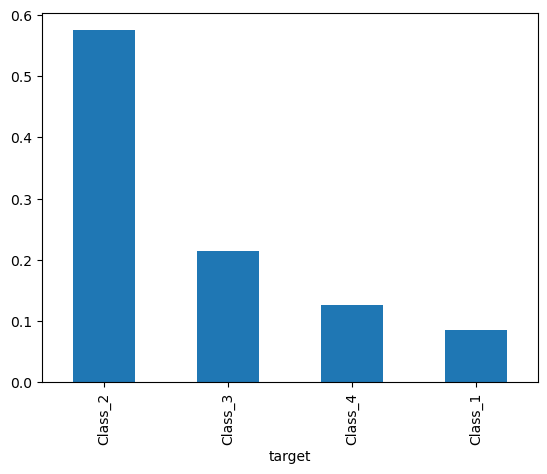

In [73]:
train['target'].value_counts(normalize=True).plot(kind='bar')


In [74]:
X = train.iloc[:,:-1]
# Dependant variable
y = train['target']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(80000, 51)
(80000,)
(20000, 51)
(20000,)


In [75]:
X_train

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
78689,78689,0,0,0,0,0,0,0,2,0,...,0,7,0,0,0,0,0,0,0,0
76423,76423,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,2,0,4,0,3
86945,86945,0,0,0,0,23,0,0,5,1,...,2,0,0,0,0,0,3,0,0,1
57427,57427,0,0,0,2,0,0,2,1,0,...,0,0,2,0,0,3,0,0,0,2
34616,34616,0,0,0,3,0,0,1,0,1,...,0,0,0,0,0,1,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,50057,0,0,0,0,2,0,0,0,0,...,0,0,0,3,0,5,0,0,4,2
98047,98047,0,12,0,0,0,1,0,0,0,...,0,4,1,0,0,6,0,1,0,1
5192,5192,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
77708,77708,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.fit_transform(y_valid)

model = XGBClassifier(random_state=1, n_estimators=128)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [77]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.01617
Feature: 1, Score: 0.02004
Feature: 2, Score: 0.02122
Feature: 3, Score: 0.04089
Feature: 4, Score: 0.01586
Feature: 5, Score: 0.01726
Feature: 6, Score: 0.02437
Feature: 7, Score: 0.02179
Feature: 8, Score: 0.01659
Feature: 9, Score: 0.01626
Feature: 10, Score: 0.01701
Feature: 11, Score: 0.01939
Feature: 12, Score: 0.01994
Feature: 13, Score: 0.01948
Feature: 14, Score: 0.03525
Feature: 15, Score: 0.01869
Feature: 16, Score: 0.01950
Feature: 17, Score: 0.02069
Feature: 18, Score: 0.01644
Feature: 19, Score: 0.01749
Feature: 20, Score: 0.01657
Feature: 21, Score: 0.01927
Feature: 22, Score: 0.01587
Feature: 23, Score: 0.02239
Feature: 24, Score: 0.01773
Feature: 25, Score: 0.01752
Feature: 26, Score: 0.01881
Feature: 27, Score: 0.01825
Feature: 28, Score: 0.01873
Feature: 29, Score: 0.01797
Feature: 30, Score: 0.02208
Feature: 31, Score: 0.02048
Feature: 32, Score: 0.01767
Feature: 33, Score: 0.02333
Feature: 34, Score: 0.01792
Feature: 35, Score: 0.01864
Fe

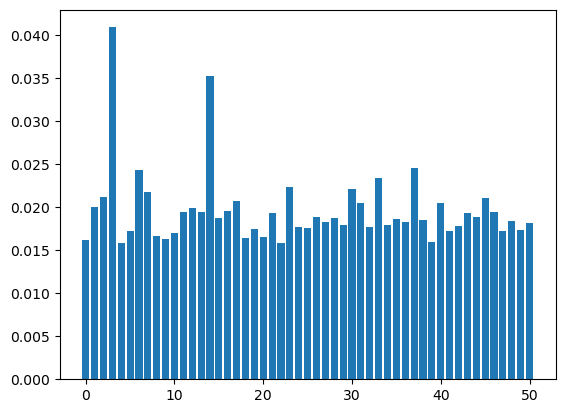

In [78]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()


In [79]:
pred = model.predict(X_valid)


In [80]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred,y_valid)
print(accuracy)


0.57495


In [81]:
y_pred = model.predict_proba(test)
print(y_pred)


[[0.09914959 0.63615835 0.16010076 0.10459129]
 [0.05084012 0.7160796  0.11829676 0.1147835 ]
 [0.08704518 0.5640923  0.20736846 0.1414941 ]
 ...
 [0.05456045 0.5130183  0.18967368 0.24274759]
 [0.20740324 0.4504465  0.18818939 0.1539609 ]
 [0.05916027 0.7008165  0.1086955  0.13132776]]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

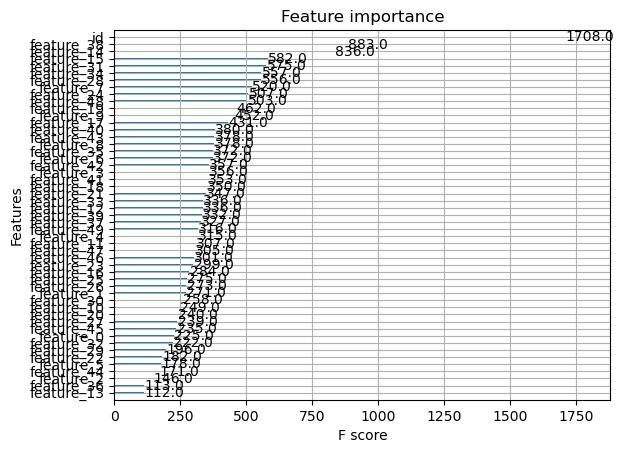

In [82]:
xgb.plot_importance(model)